In [1]:
import os
import cupy as cp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [3]:
folder = 'prova_E/E8_RE/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

200057


In [4]:
Elog = np.empty((200057, 21, 1), dtype=cp.float64)
labels_Elog = np.zeros(200057)
folder = 'prova_E/E8_RE/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Elog[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (21,1))
    Elog[i] = array
    i += 1

In [45]:
Elog[0].flatten()

array([1.00000000e+00, 0.00000000e+00, 3.00000000e+00, 5.00000000e+00,
       8.00000000e+00, 1.10000000e+01, 1.90000000e+01, 5.60000000e+01,
       8.30000000e+01, 1.77000000e+02, 2.96000000e+02, 5.34000000e+02,
       8.48000000e+02, 1.23300000e+03, 1.67800000e+03, 1.86600000e+03,
       8.98000000e+02, 4.82000000e+02, 1.13000000e+02, 8.55457396e+00,
       1.17028458e+04])

In [5]:
from sklearn.model_selection import train_test_split
E8X_train, E8X_test, E8Y_train, E8Y_test = train_test_split(Elog , labels_Elog ,test_size=0.2)

In [21]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization, Input, Concatenate

# head 1
inputs1 = Input(shape=(19,1))
conv1 = Conv1D(filters=32, kernel_size=19, kernel_initializer='he_uniform', padding='same', activation='relu')(inputs1)
pool1 = MaxPooling1D(pool_size=2)(conv1)
norm1 = BatchNormalization()(pool1)
conv2 = Conv1D(filters=64, kernel_size=19, kernel_initializer='he_uniform', padding='same', activation='relu')(norm1)
pool2 = MaxPooling1D(pool_size=2)(conv2)
norm2 = BatchNormalization()(pool2)
conv3 = Conv1D(filters=128, kernel_size=19, kernel_initializer='he_uniform', padding='same', activation='relu')(norm2)
pool3 = MaxPooling1D(pool_size=2)(conv3)
norm3 = BatchNormalization()(pool3)
flat1 = Flatten()(norm3)
# head 2
inputs2 = Input(shape=(2, 1))
dense2 = Dense(10, activation='relu', kernel_initializer='he_uniform')(inputs2)
flat2 = Flatten()(dense2)
# merge
merged = Concatenate()([flat1, flat2])
norm4 = BatchNormalization()(merged)
# interpretation
dense = Dense(10, activation='relu', kernel_initializer='he_uniform')(norm4)
dropout = Dropout(0.2)(dense)
outputs = Dense(1, activation='softmax')(dropout)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [5]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 19, 1)        0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 19, 32)       128         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 9, 32)        0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 9, 32)        128         max_pooling1d_1[0][0]            
____________________________________________________________________________________________

In [22]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [8]:
train1 = E8X_train[:, :19]
train2 = E8X_train[:, 19:]

test1 = E8X_test[:, :19]
test2 = E8X_test[:, 19:]

In [9]:
tran1 = train1/train1.max()

In [10]:
train2[:, 0] = train2[:, 0]/train2[:, 0].max()
train2[:, 1] = train2[:, 1]/train2[:, 1].max()

In [39]:
E8X_train[0]

array([[0.00000000e+00],
       [8.47098687e-04],
       [4.23549343e-04],
       [1.69419737e-03],
       [2.11774672e-03],
       [2.11774672e-03],
       [6.77678950e-03],
       [6.77678950e-03],
       [1.56713257e-02],
       [2.28716645e-02],
       [4.15078357e-02],
       [5.59085133e-02],
       [1.11817027e-01],
       [1.65184244e-01],
       [1.53748412e-01],
       [3.83312156e-01],
       [6.40406607e-01],
       [6.13722999e-01],
       [1.94409149e-01],
       [8.48267335e-01],
       [8.48267335e-01]])

In [23]:
history = model.fit([train1, train2], E8Y_train, batch_size=64, validation_data=([test1, test2], E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 27s 170us/step - loss: 7.6660 - accuracy: 0.5000 - val_loss: 7.6086 - val_accuracy: 0.5010
Epoch 2/20
160045/160045 [==============================] - 26s 165us/step - loss: 7.6660 - accuracy: 0.5000 - val_loss: 7.6086 - val_accuracy: 0.5010
Epoch 3/20
160045/160045 [==============================] - 26s 163us/step - loss: 7.6660 - accuracy: 0.5000 - val_loss: 7.6086 - val_accuracy: 0.5010
Epoch 4/20
 83328/160045 [==============>...............] - ETA: 11s - loss: 7.6653 - accuracy: 0.5001

KeyboardInterrupt: 

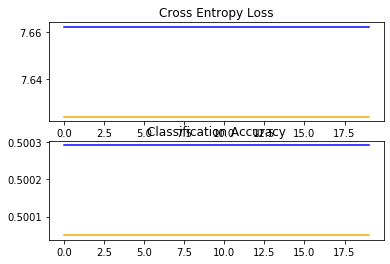

In [12]:
summarize_diagnostics(history)

# solo dense for log bins

In [22]:
model2 = Sequential()
#model1.add(Input(shape=(21,1)))
model2.add(Flatten(input_shape=(19,1)))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='sigmoid'))

In [23]:
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [25]:
history2 = model2.fit(train1, E8Y_train, batch_size=64, validation_data=(test1, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 5s 33us/step - loss: 0.6938 - accuracy: 0.5386 - val_loss: 0.6884 - val_accuracy: 0.5416
Epoch 2/20
160045/160045 [==============================] - 5s 32us/step - loss: 0.6868 - accuracy: 0.5456 - val_loss: 0.6858 - val_accuracy: 0.5475
Epoch 3/20
160045/160045 [==============================] - 4s 28us/step - loss: 0.6849 - accuracy: 0.5510 - val_loss: 0.6840 - val_accuracy: 0.5532
Epoch 4/20
160045/160045 [==============================] - 4s 27us/step - loss: 0.6835 - accuracy: 0.5546 - val_loss: 0.6826 - val_accuracy: 0.5557
Epoch 5/20
160045/160045 [==============================] - 4s 28us/step - loss: 0.6824 - accuracy: 0.5573 - val_loss: 0.6816 - val_accuracy: 0.5583
Epoch 6/20
160045/160045 [==============================] - 5s 33us/step - loss: 0.6817 - accuracy: 0.5582 - val_loss: 0.6806 - val_accuracy: 0.5603
Epoch 7/20
160045/160045 [=============================

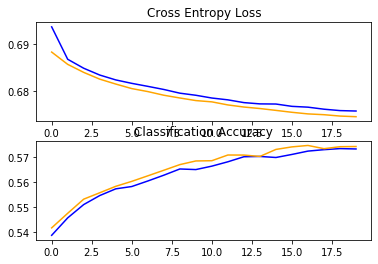

In [26]:
summarize_diagnostics(history2)

# ------------------------------------------